In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os

from tqdm.notebook import tqdm

In [2]:
def make_graph(l=8, inv_k=1/2.0,vlen=100,device='gpu'):
    if device == 'gpu':
        graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    elif device == 'cpu':
        graph = py_gauge_mc.GaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    return graph

In [3]:
inv_ks = np.linspace(0.01,1.0, 200)
ks = 1/inv_ks

all_ls = [4,6,8,10,12,14,16]
num_experiments = 10


def run_experiment_expand(args):
    return run_experiment(*args)

def run_experiment(l,k,vlen=100):
    g = make_graph(l=l, inv_k=1/k, vlen=vlen)
    for i in range(10):
        g.run_local_update(10)
        g.run_global_update()
    winding_var = g.simulate_and_get_winding_variance(10,5,5)
    return winding_var

filename = 'data.npz'

if os.path.exists(filename):
    arr = np.load(filename)
    all_ls = arr['ls']
    all_windings = arr['data']
else:
    all_windings = []
    for L in tqdm(all_ls, desc='Lattice sizes'):
        windings = []
        for k in tqdm(ks, desc='Potentials',leave=False):
            sub_windings = []
            for i in range(num_experiments):
                winding_vars = run_experiment(L,k,vlen=100)
                sub_windings.append(winding_vars)
            windings.append(sub_windings)
        all_windings.append(windings)
    all_windings = np.array(all_windings)
    np.savez(filename, ls=all_ls, data=all_windings)

Lattice sizes:   0%|          | 0/7 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

Potentials:   0%|          | 0/200 [00:00<?, ?it/s]

In [4]:
all_windings.shape

(7, 200, 10, 6)

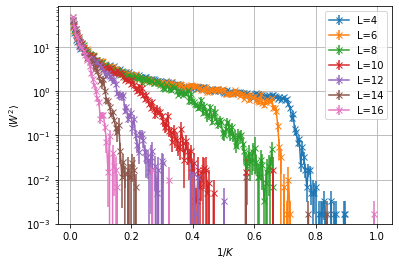

In [6]:
for l, data in zip(all_ls, all_windings):
    plt.errorbar(inv_ks, 
                 data.mean(axis=(-2,-1)), 
                 yerr=np.sqrt(data.mean(axis=-1).var(axis=-1)/num_experiments),
                 marker='x',
                 label=f'L={l}')
plt.grid()
plt.yscale('log')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.xlabel(r'$1/K$')
plt.legend()
plt.savefig('confinement_log.png', dpi=300)
plt.show()

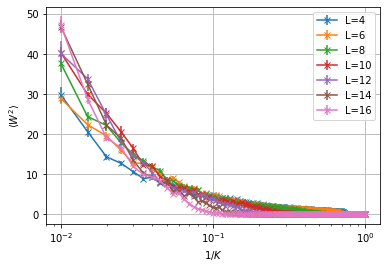

In [8]:
for l, data in zip(all_ls, all_windings):
    plt.errorbar(inv_ks, 
                 data.mean(axis=(-2,-1)), 
                 yerr=np.sqrt(data.mean(axis=-1).var(axis=-1)/num_experiments),
                 marker='x',
                 label=f'L={l}')
plt.grid()
plt.xscale('log')
plt.ylabel(r'$\langle W^2 \rangle$')
plt.xlabel(r'$1/K$')
plt.legend()
plt.savefig('confinement.png', dpi=300)
plt.show()